To get started, we'll load in our dataset that has been created to include:
Name, Count, Gender, First, Last, Year

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_name_stats = pd.read_csv("name_stats.csv")

Question #1: What are the most popular male and female names from the US database?

         Name    Count Gender  First  Last  Peak
5        Mary  4130314      F   1880  2020  1921
13  Elizabeth  1653689      F   1880  2020  1990
15   Patricia  1572554      F   1884  2020  1951
17   Jennifer  1468730      F   1916  2020  1972
19      Linda  1453408      F   1880  2020  1947
20    Barbara  1435049      F   1880  2020  1947
28   Margaret  1253426      F   1880  2020  1921
32      Susan  1122251      F   1880  2020  1955
33    Dorothy  1108769      F   1880  2020  1924
34      Sarah  1084272      F   1880  2020  1982
37    Jessica  1047881      F   1880  2020  1987
39      Helen  1020541      F   1880  2020  1918
40      Nancy  1003004      F   1880  2020  1947
41      Betty  1000106      F   1880  2020  1930
42      Karen   986933      F   1881  2020  1957
44       Lisa   965824      F   1886  2020  1965
50       Anna   900284      F   1880  2020  1918
52     Sandra   874321      F   1904  2020  1947
53      Emily   865503      F   1880  2020  1999
56     Ashley   8499

<ipython-input-19-5a4b1ead408f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female = df[df_name_stats["Gender"] == "F"]
<ipython-input-19-5a4b1ead408f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_male = df[df_name_stats["Gender"] == "M"]


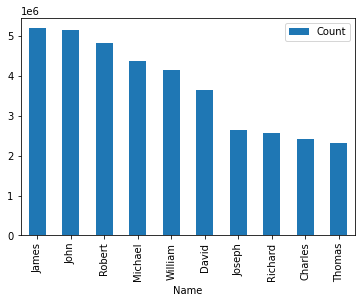

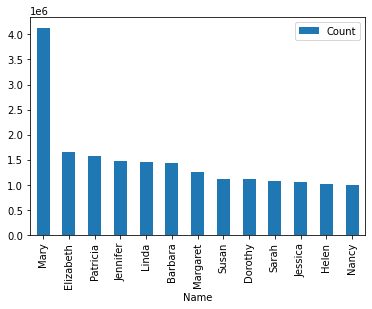

In [19]:
df_name_stats.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending
df_name_stats.reset_index(drop=True, inplace=True) # re-index

df = df_name_stats.loc[0:100] # pull out top 100 (by Count)   

df_female = df[df_name_stats["Gender"] == "F"]    
df_male = df[df_name_stats["Gender"] == "M"]  
print(df_female.head(20))
print(df_male.head(20))

df_male = df_male.loc[0:10]
df_male.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show()

df_female = df_female.loc[0:40]
df_female.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show()

Some names have become less popular over the years and have actually ceased to be used. Let's see which names have had a shorter run than others.

In [39]:
df = df_name_stats.loc[0:50000] # pull out top 20 (by Count)   


# make a new Duration column
duration = df_name_stats["Last"] - df_name_stats["First"]
df.insert(5, "Duration", duration)

#A calculation must be done to remove names that a recent additions and still popular in 2020
not2020 = df[df["Last"] < 2020]
not2020.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending
not2020.reset_index(drop=True, inplace=True) # re-index
print(not2020.head(50))



          Name   Count Gender  First  Last  Duration  Peak
0       Willie  146164      F   1880  2019       139  1919
1          Sue  144489      F   1880  2019       139  1947
2       Myrtle  136462      F   1880  2019       139  1918
3        Patty   62436      F   1880  2017       137  1959
4        Gayle   61330      F   1891  2019       128  1951
5        Patti   44704      F   1888  2018       130  1958
6         Teri   43918      F   1920  2019        99  1960
7      Laverne   42869      F   1885  2003       118  1924
8          Pat   40123      F   1897  1991        94  1941
9         Tami   37889      F   1942  2018        76  1959
10       Cheri   36042      F   1925  2019        94  1960
11     Carroll   35411      M   1880  2019       139  1934
12      Tammie   35368      F   1927  2017        90  1963
13     Deloris   34674      F   1899  2016       117  1947
14       Ronda   34308      F   1921  2017        96  1965
15         Pam   33126      F   1915  1996        81  19

<ipython-input-39-00ffbc5dae03>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not2020.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending


But let's be honest, you really just want to know about your own name. Input your name, or a series of names below to look it up.

In [63]:
enter_name = ["Timothy"]

myname = df_name_stats.query('Name == @enter_name')
print(myname)

         Name    Count Gender  First  Last  Peak
36    Timothy  1075095      M   1880  2020  1959
4473  Timothy     4325      F   1921  2016  1981


I'm interested in seeing how a names popularity changes over the years. Visualizing how it changes will make interpreting a name easier.

          Name Gender  Count  Year
944      James      M   5927  1880
2940     James      M   5441  1881
4964     James      M   5892  1882
7117     James      M   5223  1883
9319     James      M   5693  1884
11641    James      M   5175  1885
14020    James      M   5355  1886
16436    James      M   4768  1887
18977    James      M   5562  1888
21633    James      M   5020  1889
24278    James      M   5097  1890
26972    James      M   4516  1891
29760    James      M   5398  1892
32672    James      M   5030  1893
35553    James      M   5110  1894
38600    James      M   5335  1895
41666    James      M   5206  1896
44731    James      M   5113  1897
47935    James      M   5321  1898
51066    James      M   4597  1899
54490    James      M   7245  1900
57939    James      M   4735  1901
61191    James      M   5592  1902
64594    James      M   5479  1903
68065    James      M   5855  1904
71694    James      M   6042  1905
75335    James      M   5908  1906
79147    James      

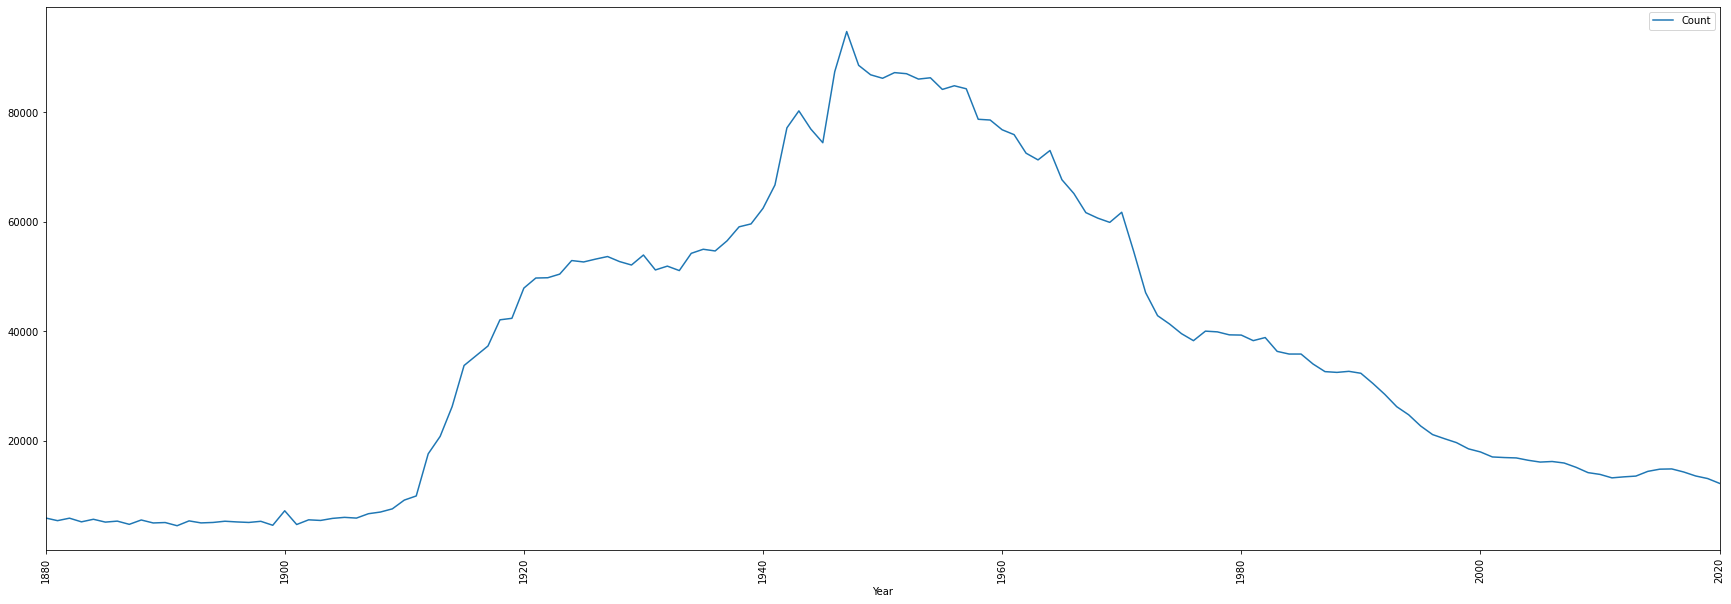

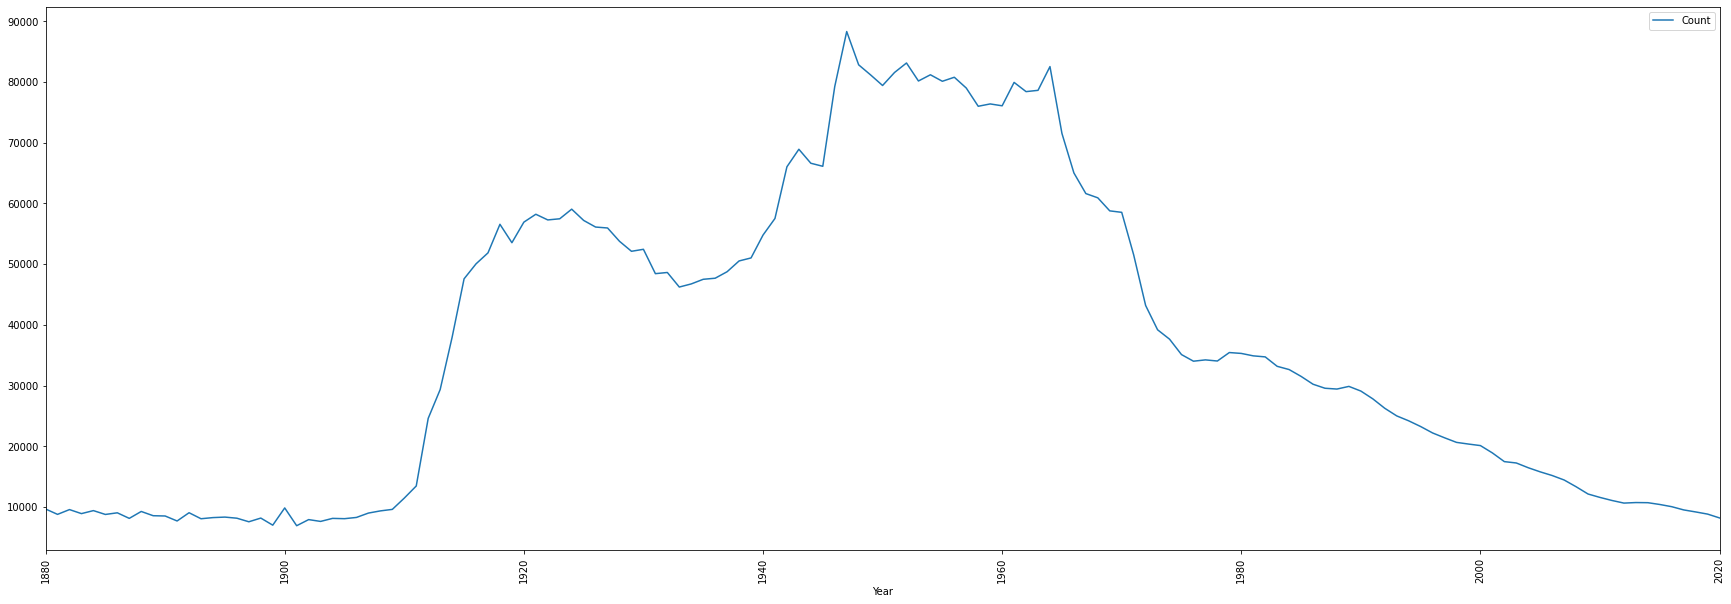

In [10]:
df = pd.read_csv("ssn_files/all_years.csv")
#print(df.head(10)) # To confirm the correct data is loading

#Enter the name you want to look up here:
#Some superstar copycat names are Apple, Maddox, 
enter_name1 = "James"
enter_name2 = "John" 
enter_gender = ["M"] 

#This is the query section using the name and gender entered above. 
dfn1 = df.query('Name == @enter_name1 & Gender==@enter_gender')
dfn2 = df.query('Name == @enter_name2 & Gender==@enter_gender')

sum_names1 = dfn1["Count"].sum()
sum_names2 = dfn2["Count"].sum()
print(dfn1)
print(enter_name1[0],"has been used", sum_names1, "times.") #Prints out the total count the name has been used.
print(enter_name2[0],"has been used", sum_names2, "times.") #Prints out the total count the name has been used.

dfn1.plot(x="Year", y="Count", figsize =(30, 10), rot=90) # rotate labels
dfn2.plot(x="Year", y="Count", figsize =(30, 10), rot=90) # rotate labels

plt.show()

James (M): 5190161 total hits
John (M): 5142243 total hits
Jonathan (M): 850006 total hits
John (F): 21715 total hits


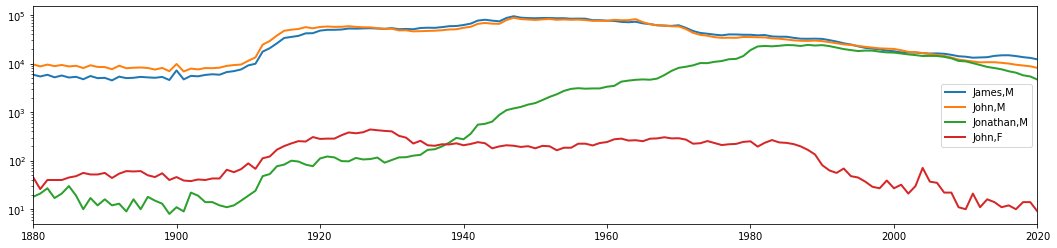

In [33]:
plt. figure(figsize=(18, 4)) # set up aspect


# Name/gender as a list, many of these
name_lst = [["James","M"], 
            ["John","M"],
            ["Jonathan","M"],
            ["John","F"]
        ]

for nd in name_lst:
    name = nd[0]
    gender = nd[1]
    

    dfn = df.query('Name == @name and Gender==@gender')
    total = dfn["Count"].sum()

    print(f"{name} ({gender}): {total} total hits")

    plt.plot( 'Year', 'Count', data=dfn, 
            linewidth=2,
            label=name+","+gender)

# show legend
plt.legend()
plt.xlim(1880, 2020) #

plt.yscale('log') # log scale makes more sense to me ...

# show graph
plt.show()

What are the most popular names by year?

In [ ]:
# Better: what are the 5 most popular names by year?